# MSCS 634 – Project Deliverable 1  
## Data Collection, Cleaning, and Exploration  
**Name**: Pawan Pandey  
**Course**: Advanced Big Data and Data Mining (MSCS-634-B01)  
**Instructor**: Satish Penmatsa  

## Dataset Overview

For this project, I selected the **Heart Disease UCI** dataset from Kaggle. The link is: https://www.kaggle.com/datasets/ineubytes/heart-disease-dataset. It contains 1026 patient records and 14 attributes, including clinical and personal data used to determine the presence of heart disease. This dataset is well-suited for data mining tasks such as classification, regression, and clustering, and it includes both categorical and numerical variables.

## Step 1: Load the Dataset

We begin by loading the dataset using Pandas and inspecting its structure.

In [1]:
import pandas as pd

# Load dataset (make sure the CSV is in the directory or provide the full path)
df = pd.read_csv("heart.csv")

# Inspect the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 2: Data Cleaning

In this step, we check for and address issues such as missing values, duplicate rows, and potential inconsistencies.

- **Missing Values**: Checked using `.isnull().sum()`
- **Duplicates**: Identified using `.duplicated()`
- **Range Validation**: Ensured all numerical values are within reasonable limits

### Check for Missing Values

In [4]:
# Check missing values
print(df.isnull().sum())

# If any missing values exist, we can use imputation
# Example: df['chol'].fillna(df['chol'].mean(), inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Remove Duplicates

In [5]:
print(f"Duplicate records: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicate records: 723


### Correct Inconsistent Data

In [6]:
# Check for out-of-range or impossible values
print(df.describe())

# For example, 'thalach' (max heart rate) should be positive
df = df[df['thalach'] > 0]

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

## Step 3: Exploratory Data Analysis (EDA)

The purpose of EDA is to explore patterns, trends, and relationships in the dataset.

### Target Variable Distribution

We begin by examining the distribution of the target variable (`target`), which indicates the presence or absence of heart disease.

- `0`: No heart disease
- `1`: Presence of heart disease

### Import Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Target Distribution

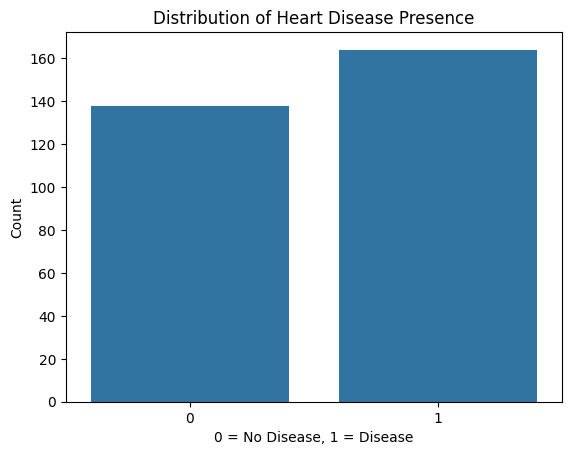

In [9]:
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Presence")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

### Feature Correlation Heatmap

A correlation heatmap helps identify the strength and direction of relationships between numeric features and the target variable.

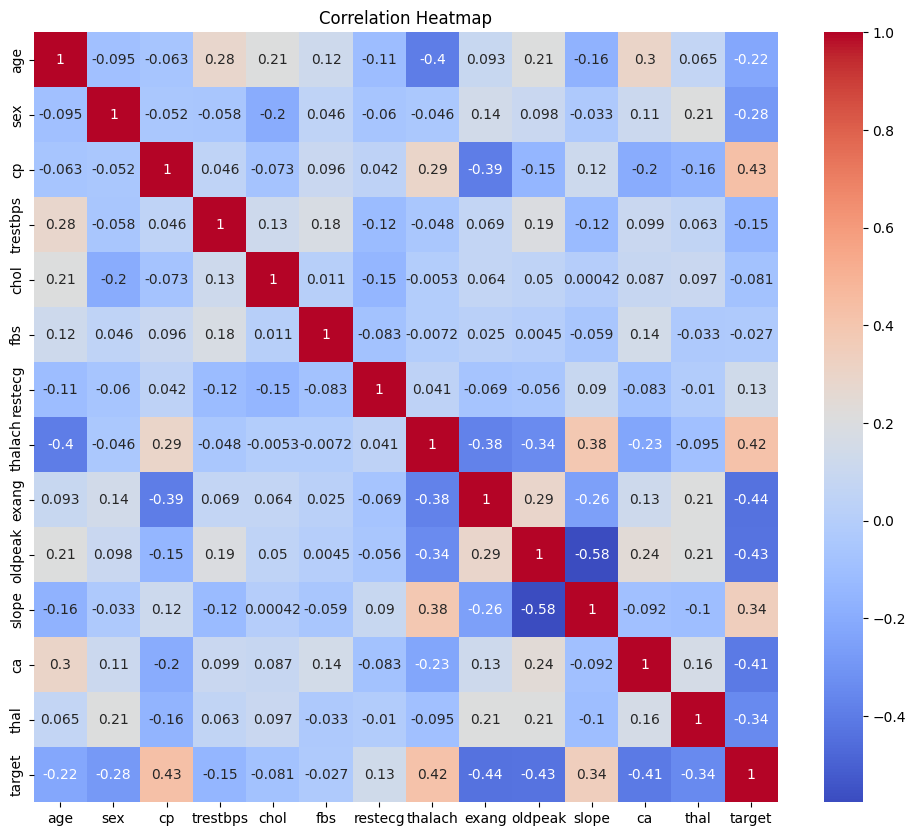

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Pair Plot

To better visualize relationships between multiple variables, we create pairplots with selected features that appear most relevant.

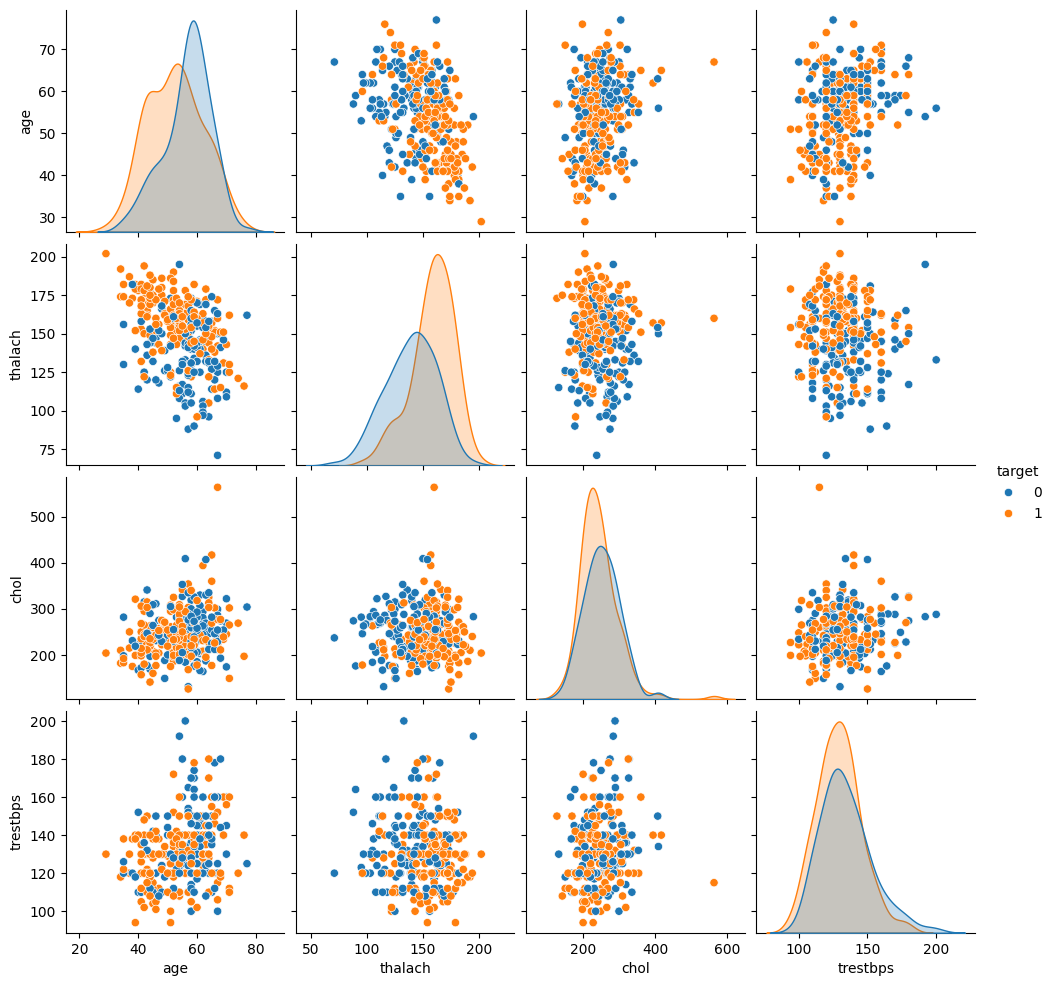

In [11]:
sns.pairplot(df[['age', 'thalach', 'chol', 'trestbps', 'target']], hue='target')
plt.show()

## Insights from EDA

Key takeaways from the exploratory analysis:

- Patients with higher `thalach` (max heart rate) tend to have heart disease.
- Chest pain type (`cp`) is highly predictive, especially type 1 (typical angina).
- `oldpeak` (ST depression) values are higher in patients without heart disease.
- Correlation is strongest between `cp`, `thalach`, `oldpeak`, and the target.

These insights will guide feature selection and model design in Deliverable 2.


## Summary of Cleaning and EDA Process

- Verified data completeness and integrity.
- Removed duplicate records.
- Validated ranges for all attributes.
- Performed EDA to identify potential predictors.
- Documented all steps with visualizations and insights.

## Next Steps

- Encode categorical variables (e.g., `cp`, `slope`, `thal`) for modeling.
- Apply feature scaling where needed.
- Build classification models to predict heart disease presence.
- Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.
